In [1]:
from qiskit import QuantumCircuit, Aer, transpile
import numpy as np
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [2]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

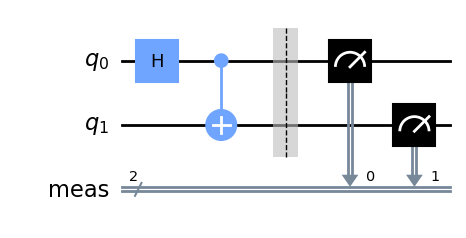

In [3]:
#Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.measure_all()
circ.draw()

In [5]:
#transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

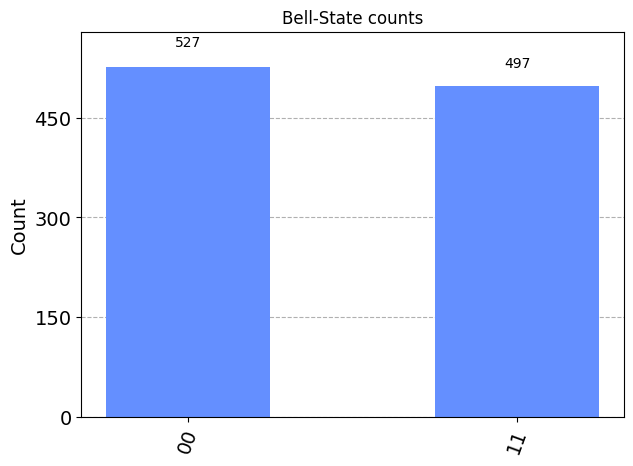

In [7]:
#run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title = 'Bell-State counts')

In [11]:
#run and get memory
result = simulator.run(circ, shots = 20, memory = True).result()
memory = result.get_memory(circ)
print(memory)

['00', '11', '11', '11', '11', '00', '11', '00', '00', '00', '00', '11', '11', '11', '00', '00', '00', '11', '00', '11']


In [13]:
#inrease the shots to reduce sampling variance
shots = 10000

In [15]:
#Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

In [16]:
#StateVector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

In [17]:
#Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

In [18]:
#Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)

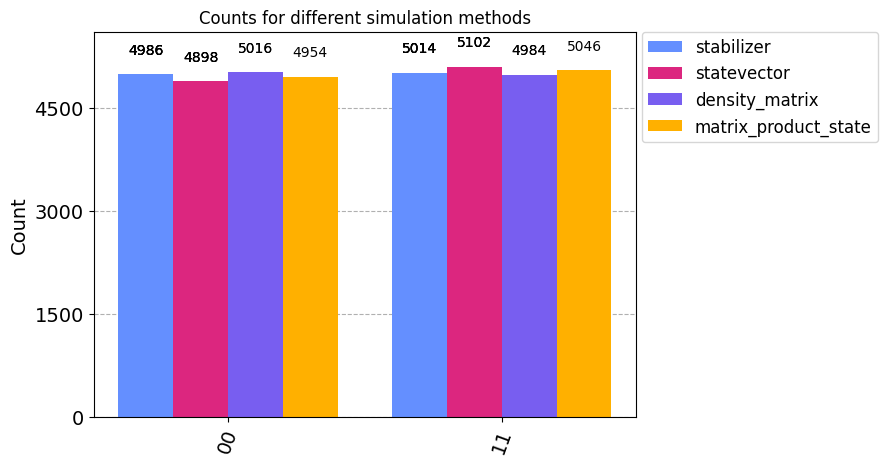

In [19]:
plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps], title = 'Counts for different simulation methods', legend = ['stabilizer', 'statevector', 'density_matrix', 'matrix_product_state'])

In [20]:
from qiskit_aer import AerError
try:
    simulator_gpu = Aer.get_backend('aer_simulator')
    simulator_gpu.set_options(device = 'GPU')
except AerError as e:
    print(e)

In [ ]:
#Configure